# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [25]:
# Import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as norm


# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

[52.15214605 41.31669383 59.63368457 50.35504162 52.17584576 44.647231
 60.57665076 50.01990736 46.60543991 55.82285977]
p = 0.932702
The sample is not normal distribution


(array([1., 1., 1., 0., 2., 2., 0., 1., 0., 2.]),
 array([41.31669383, 43.24268952, 45.16868522, 47.09468091, 49.0206766 ,
        50.9466723 , 52.87266799, 54.79866368, 56.72465938, 58.65065507,
        60.57665076]),
 <a list of 10 Patch objects>)

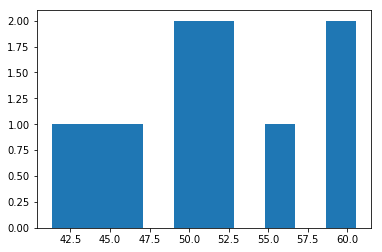

In [43]:
mu, sigma = 50, 5 # mean and standard deviation
sample10 = np.random.normal(mu, sigma, 10)
print(sample10)
norm.stats.normaltest(sample10)
statistics, pvalue = norm.stats.normaltest(sample10)
alpha = 0.05
print("p = {:g}".format(pvalue))

if pvalue < alpha:
    print("The sample is normal distribution")
else:
    print("The sample is not normal distribution")
    
plt.hist (sample10)

p = 0.0551202
The sample is not normal distribution


(array([ 1.,  1.,  0.,  3.,  9., 12., 10.,  9.,  3.,  2.]),
 array([34.97872774, 37.45303207, 39.92733639, 42.40164072, 44.87594504,
        47.35024937, 49.82455369, 52.29885802, 54.77316234, 57.24746667,
        59.72177099]),
 <a list of 10 Patch objects>)

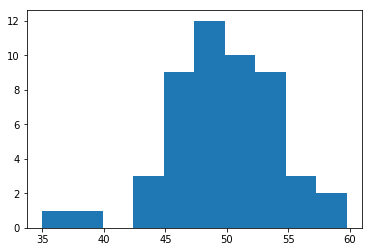

In [44]:
mu, sigma = 50, 5 # mean and standard deviation
sample50 = np.random.normal(mu, sigma, 50)
norm.stats.normaltest(sample50)
statistics, pvalue = norm.stats.normaltest(sample50)
alpha = 0.05
print("p = {:g}".format(pvalue))

if pvalue < alpha:
    print("The sample is normal distribution")
else:
    print("The sample is not normal distribution")
    
plt.hist (sample50)

p = 0.746252
The sample is not normal distribution


(array([  2.,  15.,  24.,  75.,  85., 116.,  93.,  53.,  27.,  10.]),
 array([34.15756683, 37.09174056, 40.02591428, 42.960088  , 45.89426172,
        48.82843545, 51.76260917, 54.69678289, 57.63095661, 60.56513033,
        63.49930406]),
 <a list of 10 Patch objects>)

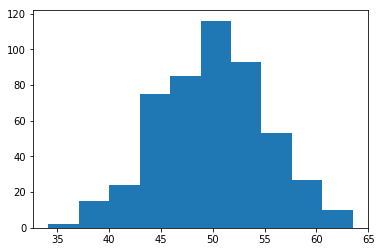

In [45]:
mu, sigma = 50, 5 # mean and standard deviation
sample500 = np.random.normal(mu, sigma, 500)
norm.stats.normaltest(sample500)
statistics, pvalue = norm.stats.normaltest(sample500)
alpha = 0.05
print("p = {:g}".format(pvalue))

if pvalue < alpha:
    print("The sample is normal distribution")
else:
    print("The sample is not normal distribution")
    
plt.hist (sample500)

p = 0.394661
The sample is not normal distribution


(array([   3.,   34.,  180.,  642., 1271., 1467.,  983.,  330.,   86.,
           4.]),
 array([29.91795099, 33.76499979, 37.6120486 , 41.4590974 , 45.30614621,
        49.15319501, 53.00024382, 56.84729262, 60.69434143, 64.54139023,
        68.38843904]),
 <a list of 10 Patch objects>)

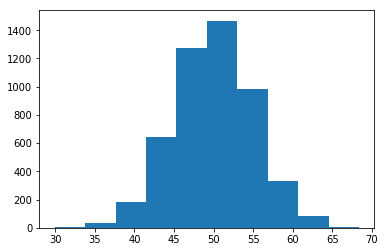

In [46]:
mu, sigma = 50, 5 # mean and standard deviation
sample5000 = np.random.normal(mu, sigma, 5000)

norm.stats.normaltest(sample5000)
statistics, pvalue = norm.stats.normaltest(sample5000)
alpha = 0.05
print("p = {:g}".format(pvalue))

if pvalue < alpha:
    print("The sample is normal distribution")
else:
    print("The sample is not normal distribution")
    
plt.hist (sample5000)

##Explicacion: 

Defino la media y la desviacion tipica 
  - mu, sigma = 50, 5
y creo mi sample con el size que quiero
  - sample = np.random.normal(mu, sigma, 10)
Defino mi pvalue como norm.stats.normaltest del sample que he creado (arriba)
Establezco un alpha que va a ser el rango de error que tienes que en este caso es 0.05 es de cir estas a un 95% seguro

    ##### pvalue < alpha 

si esto se cumple significa que la distribucion es normal
si no, no es mormal 

#### Interpret the normaltest results and make your observations.

#### Explain the test results here
Tras haber hecho una distribucion con diferentes tamaños de muestra he podido obsevar que a medida que la muesta es mayor, la distribucion se normaliza mas. Es decir, mi muesta de 10 no resulta una distribucion que se acerque mucho a lo normal sin embargo en la muestra de 5000 a pesar de no ser estrictamente simetrica se acerca mas. 

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

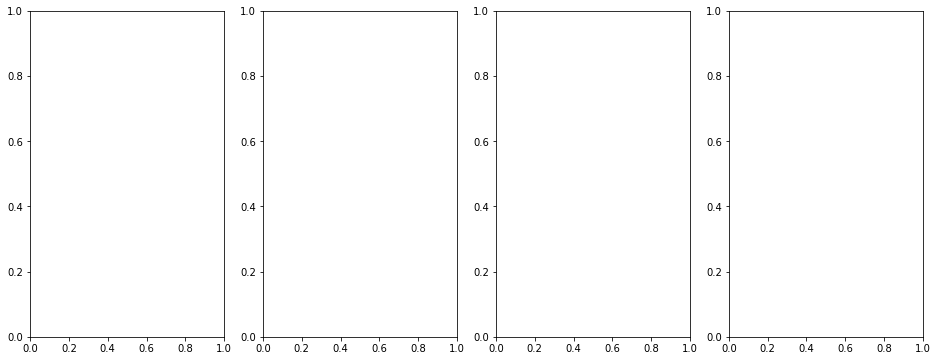

In [59]:
# Your code here
fig,axes= plt.subplots(1,4,figsize=(16,6))
sns.plot 

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
# Your comment and explanation here


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

In [ ]:
# Your code here


#### Explain what you observe from the plot above

In [ ]:
# Your comment here

#### Now plot PMP with 50, 500, and 5000 visitors.

In [ ]:
# Your code here

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [ ]:
# Your code here

#### What is the probability of getting 60 visits?

In [ ]:
# Your code here

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

In [ ]:
# your code here
